In [1]:
import math
import sys
global probabilities
probabilities = []

In [2]:
class HuffmanCode:
    def __init__(self,probability):
        self.probability = probability

    def position(self, value, index):
        for j in range(len(self.probability)):
            if(value >= self.probability[j]):
                return j
        return index-1

    def characteristics_huffman_code(self, code):
        length_of_code = [len(k) for k in code]

        mean_length = sum([a*b for a, b in zip(length_of_code, self.probability)])

        print("Average length of the code: %f" % mean_length)
  

    def compute_code(self):
        num = len(self.probability)
        huffman_code = ['']*num

        for i in range(num-2):
            val = self.probability[num-i-1] + self.probability[num-i-2]
            if(huffman_code[num-i-1] != '' and huffman_code[num-i-2] != ''):
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            elif(huffman_code[num-i-1] != ''):
                huffman_code[num-i-2] = '0'
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
            elif(huffman_code[num-i-2] != ''):
                huffman_code[num-i-1] = '1'
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            else:
                huffman_code[num-i-1] = '1'
                huffman_code[num-i-2] = '0'

            position = self.position(val, i)
            probability = self.probability[0:(len(self.probability) - 2)]
            probability.insert(position, val)
            if(isinstance(huffman_code[num-i-2], list) and isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + huffman_code[num-i-2]
            elif(isinstance(huffman_code[num-i-2], list)):
                complete_code = huffman_code[num-i-2] + [huffman_code[num-i-1]]
            elif(isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + [huffman_code[num-i-2]]
            else:
                complete_code = [huffman_code[num-i-2], huffman_code[num-i-1]]

            huffman_code = huffman_code[0:(len(huffman_code)-2)]
            huffman_code.insert(position, complete_code)

        huffman_code[0] = ['0' + symbol for symbol in huffman_code[0]]
        huffman_code[1] = ['1' + symbol for symbol in huffman_code[1]]

        if(len(huffman_code[1]) == 0):
            huffman_code[1] = '1'

        count = 0
        final_code = ['']*num

        for i in range(2):
            for j in range(len(huffman_code[i])):
                final_code[count] = huffman_code[i][j]
                count += 1

        final_code = sorted(final_code, key=len)
        return final_code

In [3]:
string = input("Enter the string to compute Huffman Code: ")

freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
length = len(string)

probabilities = [float("{:.2f}".format(frequency[1]/length)) for frequency in freq]
probabilities = sorted(probabilities, reverse=True)

huffmanClassObject = HuffmanCode(probabilities)
P = probabilities

huffman_code = huffmanClassObject.compute_code()

print(' Char | Huffman code ')
print('----------------------')

for id,char in enumerate(freq):
    if huffman_code[id]=='':
        print(' %-4r |%12s' % (char[0], 1))
        continue
    print(' %-4r |%12s' % (char[0], huffman_code[id]))

huffmanClassObject.characteristics_huffman_code(huffman_code)

Enter the string to compute Huffman Code: abacbbakjjb
 Char | Huffman code 
----------------------
 'b'  |           1
 'a'  |          01
 'j'  |         001
 'c'  |        0000
 'k'  |        0001
Average length of the code: 2.160000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#importing data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [6]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [8]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#Training and prediction

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
#Evaluating the performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0]
 [ 0  6  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
error=[]
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

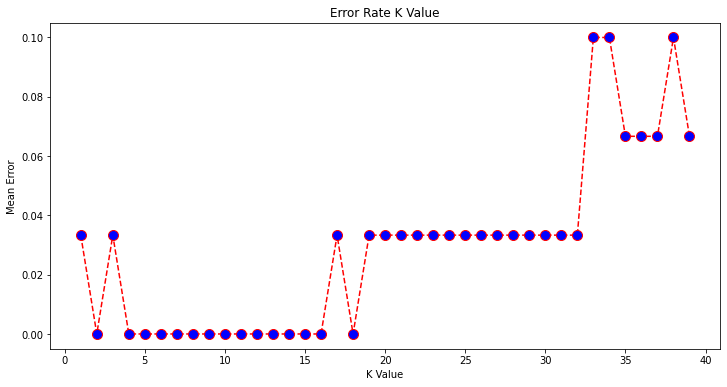

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [16]:

# Python code for run length encoding
from collections import OrderedDict
def runLengthEncoding(input):
  
    # Generate ordered dictionary of all lower
    # case alphabets, its output will be 
    # dict = {'w':0, 'a':0, 'd':0, 'e':0, 'x':0}
    dict=OrderedDict.fromkeys(input, 0)
  
    # Now iterate through input string to calculate 
    # frequency of each character, its output will be 
    # dict = {'w':4,'a':3,'d':1,'e':1,'x':6}
    for ch in input:
        dict[ch] += 1
  
    # now iterate through dictionary to make 
    # output string from (key,value) pairs
    output = ''
    for key,value in dict.items():
         output = output + key + str(value)
    return output
   
# Driver function
if __name__ == "__main__":
    input="wwwwaaadexxxxxx"
    print (runLengthEncoding(input))

w4a3d1e1x6
